# Loading data

In [3]:
import os

path = "GTDdownload/"

print(os.listdir(path))

['Codebook.pdf', 'globalterrorismdb_0718.gdb', 'globalterrorismdb_0718dist.xlsx', 'GTD Distribution letter 2018.pdf', 'GTD EULA 2018.pdf', 'gtd1993_0718dist.xlsx', 'gtd_14to17_0718dist.xlsx', 'gtd_70to95_0718dist.xlsx', 'gtd_96to13_0718dist.xlsx']


In [4]:
import pandas as pd

def loadGTD(filename):
    link = 'GTDdownload/'+filename
    file = pd.read_excel(link)
    return file

In [5]:
# loading complete dataset to memory (can take a while)
data = loadGTD("globalterrorismdb_0718dist.xlsx")

# Some descriptive analysis

In [7]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
# subsetting worldwide dataset to Nigeria 
GTDNigeria = data[data.country_txt == "Nigeria"]

In [12]:
GTDNigeria.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
3594,197602130003,1976,2,13,NaN,0,NaT,147,Nigeria,11,...,"The victims included Sergeant Adamu Michika, S...","Segun Akande, ""42 years ago, one of Nigeria's ...","""Anniversary: Motoring Error that Led to the K...",NaN,UMD Miscellaneous,-9,-9,0,-9,NaN
10026,198001170007,1980,1,17,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN
20222,198311110001,1983,11,11,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
20350,198311270001,1983,11,27,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
20362,198311290002,1983,11,29,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN


In [14]:
GTDNigeria.keys()

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [26]:
GTDNigeria.shape

(3907, 135)

# Saving Nigeria data to disk

In [21]:
def saveGTDdata(data, countryname):
    # save data by countryname
    data.to_csv("GTDdownload/"+countryname+".csv")

In [22]:
saveGTDdata(GTDNigeria, "Nigeria")
# reduced filesize to approx. 5 MB

# Plots

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [32]:
toplot = GTDNigeria.gname.value_counts()

In [38]:
toplot.head()

Boko Haram                                                 2087
Unknown                                                    1045
Fulani extremists                                           498
Movement for the Emancipation of the Niger Delta (MEND)      85
Niger Delta Avengers (NDA)                                   50
Name: gname, dtype: int64

In [42]:
toplot = toplot[toplot > 49]

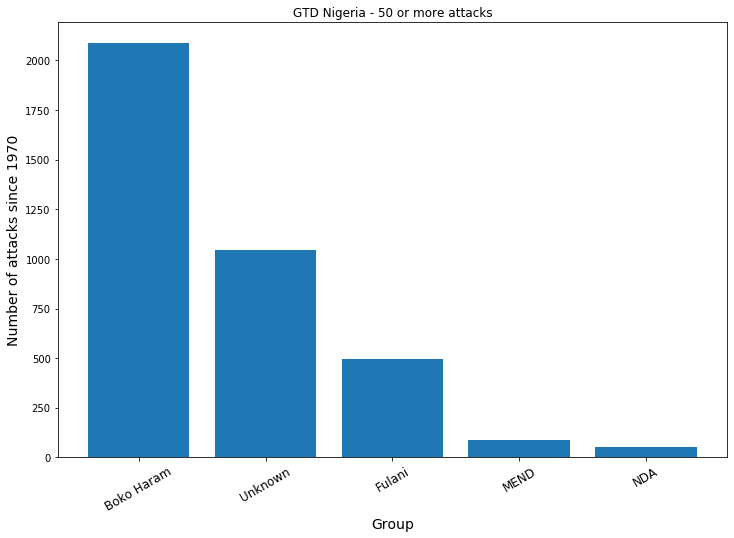

In [70]:
index = np.arange(len(toplot))
plt.bar(index, toplot)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Number of attacks since 1970', fontsize=14)
plt.xticks(index, ["Boko Haram", "Unknown", "Fulani", "MEND", "NDA"], fontsize=12, rotation=30)
plt.title('GTD Nigeria - 50 or more attacks')
plt.show()